In [1]:
import os
import shutil

# Path awal (data mentah)
raw_path = r"C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_raw"

# Path tujuan berdasarkan tipe file
organized_base = r"C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized"
paths = {
    '.csv': os.path.join(organized_base, 'csv'),
    '.pdf': os.path.join(organized_base, 'pdf'),
    '.txt': os.path.join(organized_base, 'txt')
}

# Pastikan folder tujuan ada
for path in paths.values():
    os.makedirs(path, exist_ok=True)

# Ingest and Store - pindahkan berdasarkan ekstensi
for filename in os.listdir(raw_path):
    file_path = os.path.join(raw_path, filename)
    _, ext = os.path.splitext(filename)
    ext = ext.lower()

    if ext in paths:
        target_path = os.path.join(paths[ext], filename)
        shutil.move(file_path, target_path)
        print(f"File '{filename}' dipindahkan ke '{paths[ext]}'")
    else:
        print(f"File '{filename}' tidak dikenali tipenya, dilewati.")

File 'customer_berdasar_tipe_individual_atau_store.csv' dipindahkan ke 'C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv'
File 'daftar_email_pelanggan.csv' dipindahkan ke 'C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv'
File 'daftar_ship_mrthod.csv' dipindahkan ke 'C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv'
File 'data_creditcard_terpakai_order.csv' dipindahkan ke 'C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv'
File 'jumlah_produk_berdasar_subkategori.csv' dipindahkan ke 'C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv'
File 'jumlah_produk_berdasar_warna.csv' dipindahkan ke 'C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv'
File 'order_dengan_total_diatas_10000.csv' dipindahkan ke 'C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv'
File 'pelanggan_alamat_kota_tertentu.csv' dipindahkan ke 'C:\Kuliah SI Semester

In [2]:
import pandas as pd
import os

# --- Jangan lupa sesuaikan path ini sama struktur foldermu ya ---
organized_csv_path = r"C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv"
nama_file = "top_10_customer_berdasar_jumlah_order.csv"

# Gabungin path folder dan nama file
file_path = os.path.join(organized_csv_path, nama_file)

# Baca file CSV-nya pake Pandas
# Kita pake try-except buat jaga-jaga kalo filenya ga ketemu
try:
    df_top_customers = pd.read_csv(file_path)

    # Tampilkan 5 baris pertama buat 'ngintip' isinya
    print(f"Berhasil membaca file: {nama_file}")
    print("-----------------------------------------")
    print("5 Customer Teratas Berdasarkan Jumlah Order:")
    display(df_top_customers.head())

except FileNotFoundError:
    print(f"Waduh, file nggak ketemu nih, Bara! 😥")
    print(f"Coba cek lagi path-nya: {file_path}")

Berhasil membaca file: top_10_customer_berdasar_jumlah_order.csv
-----------------------------------------
5 Customer Teratas Berdasarkan Jumlah Order:


,customerid,total_order
0,11176,28
1,11091,28
2,11711,27
3,11276,27
4,11277,27


In [3]:
# --- Langkah #2: Interogasi Data ---

print("🕵️‍♂️--- Hasil Interogasi Data ---🕵️‍♂️")

# 1. Medical Check Up Data Pake .info()
print("\n[INFO] Mengecek tipe data dan data yang kosong:")
df_top_customers.info()

# 2. Rangkuman Statistik Pake .describe()
print("\n[STATISTIK] Rangkuman untuk kolom angka:")
display(df_top_customers.describe())

# 3. Cek Ukuran Data Pake .shape
print("\n[UKURAN] Bentuk data (baris, kolom):")
print(df_top_customers.shape)

🕵️‍♂️--- Hasil Interogasi Data ---🕵️‍♂️

[INFO] Mengecek tipe data dan data yang kosong:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customerid   10 non-null     int64
 1   total_order  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes

[STATISTIK] Rangkuman untuk kolom angka:


,customerid,total_order
count,10.000000,10.000000
mean,11283.400000,27.200000
std,166.893978,0.421637
min,11091.000000,27.000000
25%,11188.750000,27.000000
50%,11276.500000,27.000000
75%,11296.750000,27.000000
max,11711.000000,28.000000



[UKURAN] Bentuk data (baris, kolom):
(10, 2)


🎨--- Membuat Visualisasi Data ---🎨


C:\Users\Pongo\AppData\Local\Temp\ipykernel_19572\2721358619.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


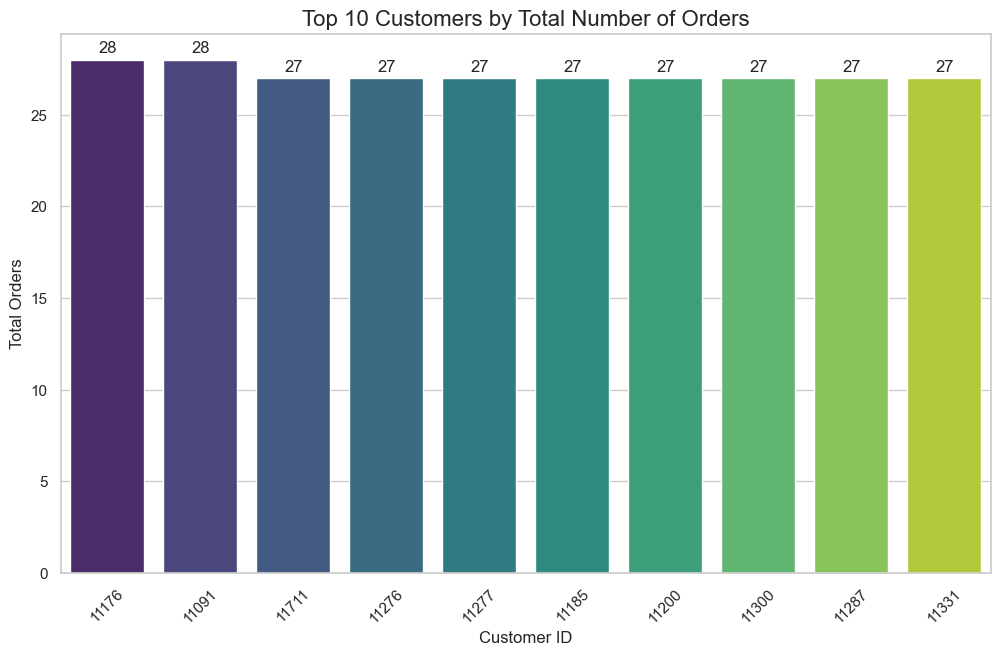

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Langkah #3: Visualisasi Data ---

print("🎨--- Membuat Visualisasi Data ---🎨")

# Atur tema biar grafiknya keliatan modern
sns.set_theme(style="whitegrid")

# Siapin 'kanvas' gambar. Ukuran (12, 7) biar grafiknya lega dan gak sempit.
plt.figure(figsize=(12, 7))

# Biar makin cakep, kita urutkan datanya dari total_order tertinggi ke terendah
# Walaupun datanya udah mirip, ini buat mastiin aja urutannya bener.
df_sorted = df_top_customers.sort_values('total_order', ascending=False)

# Ini dia perintah utama buat bikin bar chart!
# x = sumbu horizontal (ID customer)
# y = sumbu vertikal (jumlah order)
# Trik .astype(str) itu biar semua customer ID dianggap teks/label unik, bukan angka kontinu.
barplot = sns.barplot(
    x=df_sorted['customerid'].astype(str), 
    y=df_sorted['total_order'],
    palette="viridis" # Biar warnanya cakep, hehe
)

# Menambahkan label angka di atas setiap bar
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

# Kasih judul dan label biar informatif
plt.title('Top 10 Customers by Total Number of Orders', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45) # Putar label di sumbu X biar gampang dibaca

# Tampilkan mahakaryanya!
plt.show()

In [6]:
import PyPDF2
import os

# --- Path ke folder yang berisi semua file PDF-mu ---
pdf_folder = r"C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\pdf"

# Dictionary kosong untuk menampung hasil ekstraksi
# Formatnya nanti: {'nama_file_1.pdf': 'teks isi file 1', 'nama_file_2.pdf': 'teks isi file 2'}
all_pdf_texts = {}

print(f"Mulai memproses semua file PDF di folder: {pdf_folder}\n")

try:
    # Ambil semua item di dalam folder PDF
    for filename in os.listdir(pdf_folder):
        # Kita hanya proses file yang berekstensi .pdf
        if filename.lower().endswith('.pdf'):
            print(f"🔎 Memproses file: {filename}...")
            file_path = os.path.join(pdf_folder, filename)
            
            # Variabel teks kosong untuk file ini
            extracted_text = ""
            
            # Buka dan baca file PDF-nya
            with open(file_path, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                for page in reader.pages:
                    extracted_text += page.extract_text()
            
            # Simpan hasilnya ke dictionary
            all_pdf_texts[filename] = extracted_text

    print("\n✅--- SEMUA FILE PDF BERHASIL DIPROSES ---✅")
    
    # Cetak hasil untuk verifikasi
    print(f"\nTotal file yang diproses: {len(all_pdf_texts)} file.")
    print("Berikut adalah cuplikan teks dari setiap file:")
    for filename, text in all_pdf_texts.items():
        # Cetak nama file dan 50 karakter pertama dari isinya
        print(f"\n--- {filename} ---")
        print(f'"{text[:150]}..."') # Ambil 150 karakter pertama aja biar gak kepanjangan

except FileNotFoundError:
    print(f"WADUH, FOLDER GAK KETEMU! 😥 Cek lagi path ini ya: {pdf_folder}")
except Exception as e:
    print(f"Oops, ada error nih: {e}")

Mulai memproses semua file PDF di folder: C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\pdf

🔎 Memproses file: Reports-Company (1).pdf...
🔎 Memproses file: Reports-Company (10).pdf...
🔎 Memproses file: Reports-Company (11).pdf...
🔎 Memproses file: Reports-Company (12).pdf...
🔎 Memproses file: Reports-Company (13).pdf...
🔎 Memproses file: Reports-Company (14).pdf...
🔎 Memproses file: Reports-Company (15).pdf...
🔎 Memproses file: Reports-Company (16).pdf...
🔎 Memproses file: Reports-Company (17).pdf...
🔎 Memproses file: Reports-Company (18).pdf...
🔎 Memproses file: Reports-Company (19).pdf...
🔎 Memproses file: Reports-Company (2).pdf...
🔎 Memproses file: Reports-Company (20).pdf...
🔎 Memproses file: Reports-Company (3).pdf...
🔎 Memproses file: Reports-Company (4).pdf...
🔎 Memproses file: Reports-Company (5).pdf...
🔎 Memproses file: Reports-Company (6).pdf...
🔎 Memproses file: Reports-Company (7).pdf...
🔎 Memproses file: Reports-Company (8).pdf...
🔎 Memproses file: 

In [7]:
# --- Langkah Lanjutan: Interogasi PDF dengan Keyword Search ---

# Dictionary all_pdf_texts dari langkah sebelumnya harus sudah ada di memori ya.

# Tentukan kata kunci yang mau kita cari. Kamu bisa ganti kata ini sesukamu.
keyword_to_search = "teknologi"

# List kosong untuk menyimpan nama file yang mengandung keyword
found_in_files = []

print(f"🔎 Mencari kata kunci '{keyword_to_search}' di semua file PDF...")

# Kita "obrak-abrik" dictionary hasil ekstraksi tadi
for filename, text in all_pdf_texts.items():
    # Cek apakah keyword ada di dalam teks. 
    # .lower() dipakai agar pencarian tidak peduli huruf besar/kecil ('Teknologi' dan 'teknologi' sama saja)
    if keyword_to_search.lower() in text.lower():
        found_in_files.append(filename)

# Setelah selesai mencari, kita laporkan hasilnya
if found_in_files:
    print(f"\n✅ Ditemukan! Kata kunci '{keyword_to_search}' ada di file berikut:")
    for filename in found_in_files:
        print(f"  - {filename}")
else:
    print(f"\n❌ Yah, kata kunci '{keyword_to_search}' tidak ditemukan di file manapun.")

🔎 Mencari kata kunci 'teknologi' di semua file PDF...

✅ Ditemukan! Kata kunci 'teknologi' ada di file berikut:
  - Reports-Company (1).pdf
  - Reports-Company (11).pdf


In [8]:
import os

# Path ke folder txt
txt_folder = r"C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\txt"
all_txt_data = {}

print(f"Mulai memproses semua file TXT di folder: {txt_folder}\n")

try:
    for filename in os.listdir(txt_folder):
        if filename.lower().endswith('.txt'):
            print(f"💬 Membaca file: {filename}...")
            file_path = os.path.join(txt_folder, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                all_txt_data[filename] = file.read()

    print("\n✅--- SEMUA FILE TXT BERHASIL DIBACA ---✅")
    print(f"\nTotal file yang diproses: {len(all_txt_data)} file.")

except Exception as e:
    print(f"Oops, ada error nih: {e}")

Mulai memproses semua file TXT di folder: C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\txt

💬 Membaca file: tweet-1.txt...
💬 Membaca file: tweet-10.txt...
💬 Membaca file: tweet-11.txt...
💬 Membaca file: tweet-12.txt...
💬 Membaca file: tweet-13.txt...
💬 Membaca file: tweet-14.txt...
💬 Membaca file: tweet-15.txt...
💬 Membaca file: tweet-16.txt...
💬 Membaca file: tweet-17.txt...
💬 Membaca file: tweet-18.txt...
💬 Membaca file: tweet-19.txt...
💬 Membaca file: tweet-2.txt...
💬 Membaca file: tweet-20.txt...
💬 Membaca file: tweet-3.txt...
💬 Membaca file: tweet-4.txt...
💬 Membaca file: tweet-5.txt...
💬 Membaca file: tweet-6.txt...
💬 Membaca file: tweet-7.txt...
💬 Membaca file: tweet-8.txt...
💬 Membaca file: tweet-9.txt...

✅--- SEMUA FILE TXT BERHASIL DIBACA ---✅

Total file yang diproses: 20 file.


In [10]:
import pandas as pd
from textblob import TextBlob

# --- Analisis Sentimen untuk SEMUA Tweet ---

# List kosong untuk menampung hasil analisis
sentiment_results = []

print("👩‍⚕️ Menganalisis sentimen untuk semua tweet...")

# Loop melalui dictionary data teks kita
for filename, text in all_txt_data.items():
    # Buat objek TextBlob
    blob = TextBlob(text)
    
    # Dapatkan polarity dan subjectivity
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Tambahkan hasil ke dalam list kita dalam bentuk dictionary
    sentiment_results.append({
        'file': filename,
        'polarity': polarity,
        'subjectivity': subjectivity,
        'tweet': text
    })

# Ubah list of dictionaries tadi menjadi sebuah DataFrame Pandas
df_sentiment = pd.DataFrame(sentiment_results)

# Tambahkan kolom kesimpulan (Positif/Negatif/Netral) biar gampang dibaca
def get_sentiment_label(polarity):
    if polarity > 0.1:
        return "Positif"
    elif polarity < -0.1:
        return "Negatif"
    else:
        return "Netral"

df_sentiment['kesimpulan'] = df_sentiment['polarity'].apply(get_sentiment_label)

print("\n✅--- Analisis Selesai! ---✅")
print("Berikut adalah laporan sentimen untuk semua tweet:")

# Tampilkan tabel hasilnya dengan rapi
display(df_sentiment)

👩‍⚕️ Menganalisis sentimen untuk semua tweet...

✅--- Analisis Selesai! ---✅
Berikut adalah laporan sentimen untuk semua tweet:


,file,polarity,subjectivity,tweet,kesimpulan
0,tweet-1.txt,0.500000,0.500000,"🚴‍♂️ ""Baru beli sepeda dari AdventureWorks, sm...",Positif
1,tweet-10.txt,0.000000,0.000000,"\n""AdventureWorks perlu banget kolaborasi sama...",Netral
2,tweet-11.txt,0.000000,0.000000,"""Quality kontrol mereka luar biasa. Udah beli ...",Netral
3,tweet-12.txt,0.000000,0.000000,"""Kalau kalian ke store AdventureWorks, coba mi...",Netral
4,tweet-13.txt,0.000000,0.000000,"""AdventureWorks paham banget sama komunitasnya...",Netral
5,tweet-14.txt,0.000000,0.000000,"""Produk bagus, harga oke, tapi sayang variasi ...",Netral
6,tweet-15.txt,0.000000,0.000000,"""AdventureWorks salah satu yang pertama pakai ...",Netral
7,tweet-16.txt,0.000000,0.000000,"""Wish list 2025: AdventureWorks rilis sepeda l...",Netral
8,tweet-17.txt,0.000000,0.000000,"""Respect buat AdventureWorks yang berani buka ...",Netral
9,tweet-18.txt,0.000000,0.000000,"""AdventureWorks ini contoh nyata gimana digita...",Netral


☁️--- Inilah Word Cloud dari Semua Tweet! ---☁️


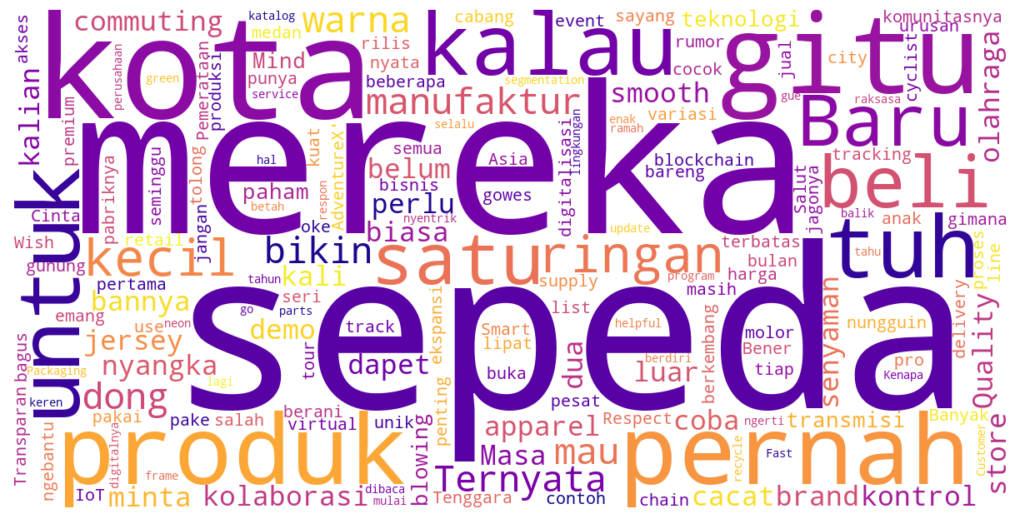

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Membuat Word Cloud dari Semua Tweet ---

# 1. Gabungkan semua teks tweet jadi satu paragraf raksasa
all_tweets_text = " ".join(text for text in all_txt_data.values())

# 2. Buat daftar 'stop words' dalam Bahasa Indonesia
# Ini kata-kata umum yang mau kita abaikan. 
# 'adventureworks' juga kita masukkan, karena kita sudah tau itu topik utamanya,
# kita mau liat kata-kata PENTING LAINNYA.
stopwords = set([
    "di", "dan", "yang", "ini", "itu", "ke", "dari", "buat", "aja", "gak", "ga", "engga", 
    "ga", "gak", "nggak", "nya", "sih", "deh", "kok", "mah", "banget", "udah", "ada", 
    "bisa", "jadi", "sama", "tapi", "juga", "adventureworks"
])

# 3. Buat objek WordCloud
# Kita atur ukuran, warna background, dan yang terpenting, daftar stopwords-nya.
wordcloud = WordCloud(
    width=1200, 
    height=600, 
    background_color='white',
    stopwords=stopwords,
    min_font_size=10,
    colormap='plasma' # Biar warnanya seru!
).generate(all_tweets_text)

# 4. Tampilkan gambar Word Cloud yang sudah jadi menggunakan Matplotlib
print("☁️--- Inilah Word Cloud dari Semua Tweet! ---☁️")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Sembunyikan sumbu x dan y
plt.tight_layout(pad=0)
plt.show()

✅ Tabel sentimen berhasil disimpan sebagai file: 'hasil_analisis_sentimen.csv'
   (Coba cek di folder projectmu, file ini bisa dibuka pake Excel!)


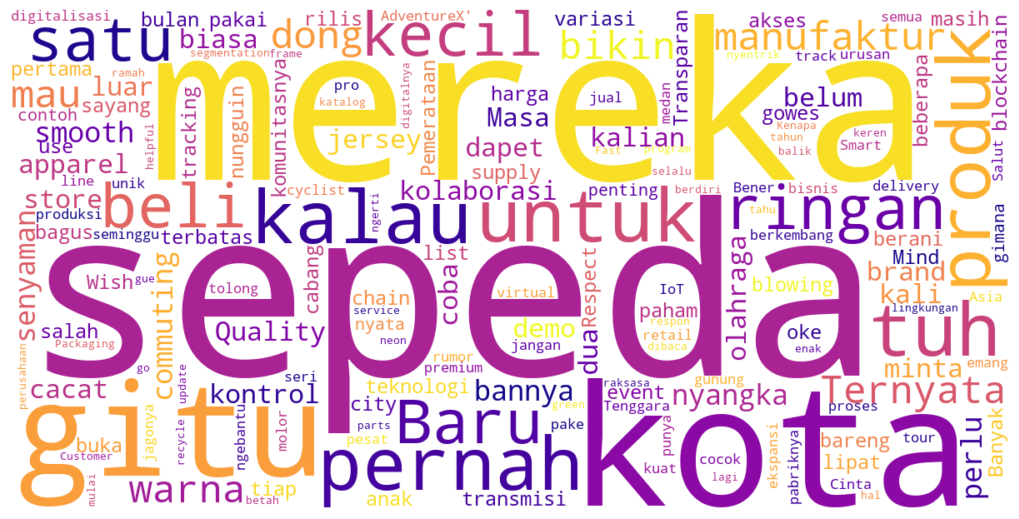


✅ Word Cloud berhasil disimpan sebagai file: 'hasil_word_cloud.png'
   (Cek di folder projectmu, gambarnya bisa kamu pakai buat laporan!)


In [12]:
# --- BONUS ROUND: Simpan Semua Hasil ---

# 1. Simpan DataFrame Sentimen ke File CSV
# 'index=False' artinya kita gak perlu simpan nomor baris dari DataFrame-nya.
output_csv_path = 'hasil_analisis_sentimen.csv'
df_sentiment.to_csv(output_csv_path, index=False, encoding='utf-8-sig')

print(f"✅ Tabel sentimen berhasil disimpan sebagai file: '{output_csv_path}'")
print("   (Coba cek di folder projectmu, file ini bisa dibuka pake Excel!)")


# 2. Simpan Gambar Word Cloud ke File PNG
# Kita perlu generate ulang word cloud-nya untuk bisa disimpan
# (Copy-paste dari kode sebelumnya, dengan tambahan plt.savefig)
try:
    all_tweets_text = " ".join(text for text in all_txt_data.values())
    stopwords = set(["di", "dan", "yang", "ini", "itu", "ke", "dari", "buat", "aja", "gak", "ga", "engga", "nya", "sih", "deh", "kok", "mah", "banget", "udah", "ada", "bisa", "jadi", "sama", "tapi", "juga", "adventureworks"])
    
    wordcloud = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, min_font_size=10, colormap='plasma').generate(all_tweets_text)
    
    output_png_path = 'hasil_word_cloud.png'
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    # Perintah untuk menyimpan gambar sebelum ditampilkan. dpi=300 biar resolusinya bagus.
    plt.savefig(output_png_path, dpi=300, bbox_inches='tight')
    plt.show() # Tetap tampilkan di notebook

    print(f"\n✅ Word Cloud berhasil disimpan sebagai file: '{output_png_path}'")
    print("   (Cek di folder projectmu, gambarnya bisa kamu pakai buat laporan!)")

except Exception as e:
    print(f"Oops, ada error pas nyimpen Word Cloud: {e}")

In [14]:
import pandas as pd
from textblob import TextBlob
import os

# --- DEPARTEMEN-DEPARTEMEN DI DALAM API ---

# Departemen 1: Layanan Top Customer (kode dari tadi)
def get_top_10_customers():
    print("📞 Memproses permintaan ke 'Layanan Top 10 Customer'...")
    csv_folder = r"C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\csv"
    nama_file = "top_10_customer_berdasar_jumlah_order.csv"
    file_path = os.path.join(csv_folder, nama_file)
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        return None

# Departemen 2: Layanan Analisis Sentimen (BARU!)
def get_sentiment_analysis():
    print("📞 Memproses permintaan ke 'Layanan Analisis Sentimen'...")
    txt_folder = r"C:\Kuliah SI Semester 4\Data Lakehouse\Project Python\data_organized\txt"
    all_txt_data = {}
    sentiment_results = []

    # Baca semua file txt (logika dari tadi kita bungkus di sini)
    for filename in os.listdir(txt_folder):
        if filename.lower().endswith('.txt'):
            file_path = os.path.join(txt_folder, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                all_txt_data[filename] = file.read()
    
    # Lakukan analisis (logika dari tadi kita bungkus di sini)
    for filename, text in all_txt_data.items():
        blob = TextBlob(text)
        sentiment_results.append({
            'file': filename, 'polarity': blob.sentiment.polarity, 
            'subjectivity': blob.sentiment.subjectivity, 'tweet': text
        })
    
    df_sentiment = pd.DataFrame(sentiment_results)
    
    def get_sentiment_label(polarity):
        if polarity > 0.1: return "Positif"
        elif polarity < -0.1: return "Negatif"
        else: return "Netral"
    
    df_sentiment['kesimpulan'] = df_sentiment['polarity'].apply(get_sentiment_label)
    return df_sentiment

# --- MANAJER RESEPSIONIS (PINTU UTAMA API) ---

def get_data_from_lake(request_name):
    """
    Ini adalah PINTU UTAMA API. Semua permintaan masuk lewat sini.
    """
    print(f"\n🛎️ Resepsionis utama menerima permintaan untuk: '{request_name}'")
    
    if request_name == "top_10_customers":
        return get_top_10_customers()
    elif request_name == "sentiment_analysis_report":
        return get_sentiment_analysis()
    else:
        print("❌ Maaf, layanan tersebut tidak tersedia.")
        return None

# --- SIMULASI PENGGUNAAN API LENGKAP ---

# 1. Tamu pertama minta data top customer
print("--- Tamu 1 Minta Data Top Customer ---")
top_cust_data = get_data_from_lake("top_10_customers")
if top_cust_data is not None:
    display(top_cust_data)

# 2. Tamu kedua minta laporan analisis sentimen
print("\n--- Tamu 2 Minta Laporan Sentimen ---")
sentiment_report = get_data_from_lake("sentiment_analysis_report")
if sentiment_report is not None:
    # Tampilkan 5 baris pertama aja biar gak kepanjangan
    display(sentiment_report.head())

--- Tamu 1 Minta Data Top Customer ---

🛎️ Resepsionis utama menerima permintaan untuk: 'top_10_customers'
📞 Memproses permintaan ke 'Layanan Top 10 Customer'...


,customerid,total_order
0,11176,28
1,11091,28
2,11711,27
3,11276,27
4,11277,27
5,11185,27
6,11200,27
7,11300,27
8,11287,27
9,11331,27



--- Tamu 2 Minta Laporan Sentimen ---

🛎️ Resepsionis utama menerima permintaan untuk: 'sentiment_analysis_report'
📞 Memproses permintaan ke 'Layanan Analisis Sentimen'...


,file,polarity,subjectivity,tweet,kesimpulan
0,tweet-1.txt,0.5,0.5,"🚴‍♂️ ""Baru beli sepeda dari AdventureWorks, sm...",Positif
1,tweet-10.txt,0.0,0.0,"\n""AdventureWorks perlu banget kolaborasi sama...",Netral
2,tweet-11.txt,0.0,0.0,"""Quality kontrol mereka luar biasa. Udah beli ...",Netral
3,tweet-12.txt,0.0,0.0,"""Kalau kalian ke store AdventureWorks, coba mi...",Netral
4,tweet-13.txt,0.0,0.0,"""AdventureWorks paham banget sama komunitasnya...",Netral


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import os

# --- 1. SIAPKAN KONEKSI KE POSTGRESQL ---
# Ganti ini dengan kredensial databasemu sendiri ya
db_user = 'postgres'  # atau user-mu yang lain
db_password = 'ardiwinata230803' # GANTI DENGAN PASSWORD-MU
db_host = 'localhost'
db_port = '5432'
db_name = 'adventureworks_st' # GANTI DENGAN NAMA DB YANG KAMU BUAT

# Membuat 'connection string' yang dipahami oleh SQLAlchemy
connection_string = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

try:
    # Membuat 'engine' yang akan digunakan Pandas untuk berkomunikasi
    engine = create_engine(connection_string)
    
    # Coba koneksi
    with engine.connect() as connection:
        print(f"✅ Koneksi ke database '{db_name}' berhasil!")
        print("Versi PostgreSQL:", connection.dialect.server_version_info)
        
except Exception as e:
    print(f"❌ Gagal konek ke database! Cek lagi kredensial atau pastikan server jalan ya.")
    print(f"Error: {e}")

✅ Koneksi ke database 'adventureworks_st' berhasil!
Versi PostgreSQL: (16, 4)


In [5]:
# --- 2. PROSES & LOAD SATU FILE CSV ---

# Ganti dengan path ke folder 'organized/csv' di projectmu
csv_folder = r"C:\Kuliah SI Semester 4\Data Lakehouse\project_folder\data_organized\csv" 
file_to_load = 'top_10_customer_berdasar_jumlah_order.csv'
file_path = os.path.join(csv_folder, file_to_load)

# Nama tabel yang akan dibuat di PostgreSQL (praktik terbaik: huruf kecil semua)
table_name = "top_10_customers"

try:
    print(f"Membaca file '{file_to_load}'...")
    # Baca file CSV ke dalam DataFrame Pandas
    df = pd.read_csv(file_path)
    
    print(f"Memuat data ke tabel PostgreSQL '{table_name}'...")
    # Ini dia 'magic command'-nya!
    df.to_sql(table_name, engine, if_exists='replace', index=False)
    
    print(f"\n✅ SUKSES! Data dari file CSV berhasil dimuat ke tabel '{table_name}'.")
    
except FileNotFoundError:
    print(f"❌ GAGAL! File tidak ditemukan di: {file_path}")
except Exception as e:
    print(f"❌ GAGAL! Terjadi error: {e}")


Membaca file 'top_10_customer_berdasar_jumlah_order.csv'...
Memuat data ke tabel PostgreSQL 'top_10_customers'...

✅ SUKSES! Data dari file CSV berhasil dimuat ke tabel 'top_10_customers'.
